In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
#define x range
size = 100 
x_values = np.arange(0,size,1)

In [28]:
#define y as 1:1 with x + noise
y_values_noise = np.zeros(size)
noise = np.random.normal(0, 5, size) #mean, std, size

for i in range(size): 
    y_values_noise[i] = x_values[i] + noise[i]

In [29]:
X = x_values
y = y_values_noise
lin_reg = LinearRegression()

In [103]:
train_mse, test_mse, train_r2, test_r2  = (np.zeros(18) for i in range(4))
degrees = range(2,20)

for index in degrees:
    trans = PolynomialFeatures(degree=index, include_bias=False)
    X_trans = trans.fit_transform(x_values.reshape(-1, 1))
    X_trans_df = pd.DataFrame(X_trans)
 
    X_train, X_test, y_train, y_test = train_test_split(X_trans_df,y,test_size=0.35,random_state=0)

    lin_reg.fit(X_train,y_train)
    
    y_train_predict = lin_reg.predict(X_train)
    train_mse[index-2] = mean_squared_error(y_train_predict, y_train) 
    train_r2[index-2] = r2_score(y_train_predict, y_train)
    
    y_test_predict = lin_reg.predict(X_test)
    test_mse[index-2] = mean_squared_error(y_test_predict, y_test)
    test_r2[index-2] = r2_score(y_test_predict, y_test)

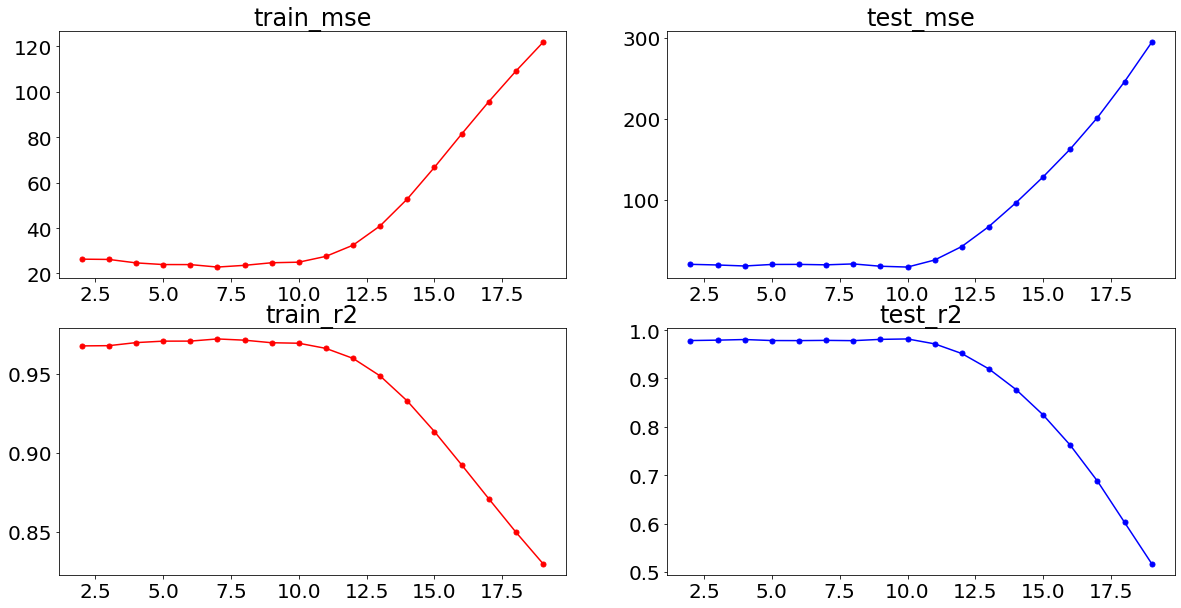

In [104]:
figure, axis = plt.subplots(2, 2)
  
axis[0, 0].plot(degrees, train_mse, color='red', label="train_mse", marker = 'o', ms = 5)
axis[0, 0].set_title("train_mse")
  
axis[0, 1].plot(degrees, test_mse, color='blue', label="test_mse", marker = 'o', ms = 5)
axis[0, 1].set_title("test_mse")
  
axis[1, 0].plot(degrees, train_r2, color='red', label="train_r2", marker = 'o', ms = 5)
axis[1, 0].set_title("train_r2")
  
axis[1, 1].plot(degrees, test_r2, color='blue', label="test_r2", marker = 'o', ms = 5)
axis[1, 1].set_title("test_r2")
  
plt.show()

In [81]:
ppar = [4, 3, -2, 10]
p = np.poly1d(ppar)

print (np.polyval(ppar, 3))

139


In [84]:
li = [1, 2, 3, 4, 5, 7, 8]
 
final_list = list(map(lambda x: p(x), li))

print(final_list)

[15, 50, 139, 306, 575, 1515, 2234]
